# Donna men desu ka?

In [112]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [113]:
from fastai.vision import *
from fastai.metrics import error_rate

In [114]:
bs = 64
classes = ['ramen', 'soba', 'udon']
pathstr = "/home/jupyter/mydata/Japanese Noodles/images"
path = Path(pathstr)

In [115]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ramen


soba


udon


In [116]:
np.random.seed(87)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

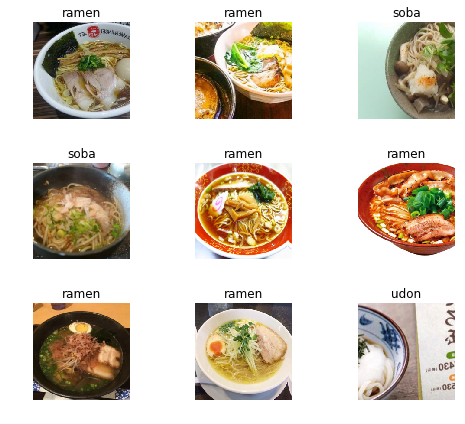

In [117]:
data.show_batch(rows=3, figsize=(7,6))

In [118]:
print(data.classes)
len(data.classes),data.c

['ramen', 'soba', 'udon']


(3, 3)

In [119]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [120]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.927919,0.560364,0.762931


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


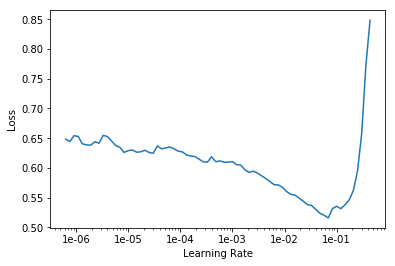

In [121]:
learn.lr_find(); learn.recorder.plot()

In [123]:
learn.fit_one_cycle(5, slice(1e-02))

epoch,train_loss,valid_loss,accuracy
1,0.234095,0.422436,0.844828
2,0.249275,0.447378,0.818965
3,0.249572,0.450964,0.849138
4,0.232678,0.432550,0.857759
5,0.220156,0.424602,0.866379


In [124]:
learn.save('stage-1')

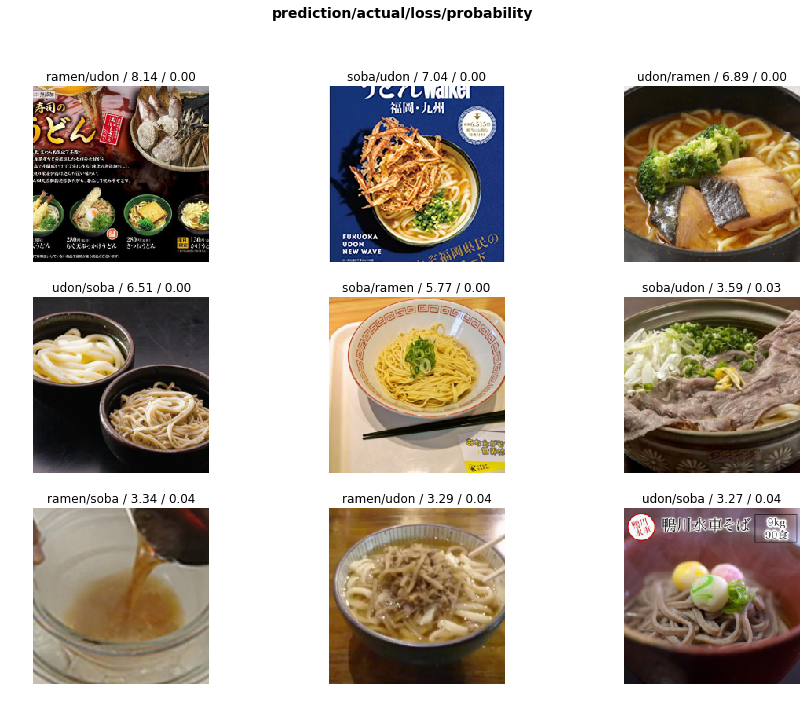

In [125]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [126]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


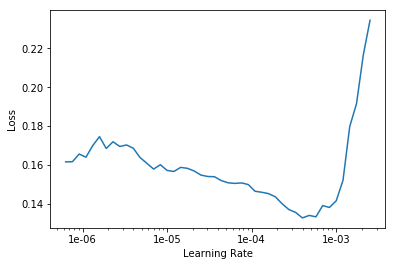

In [127]:
learn.lr_find(); learn.recorder.plot()

In [130]:
learn.fit_one_cycle(4, max_lr=slice(1e-04))

epoch,train_loss,valid_loss,accuracy
1,0.097975,0.402601,0.875000
2,0.107574,0.402933,0.875000
3,0.099681,0.395155,0.875000
4,0.097414,0.387091,0.870690


In [134]:
learn.save('model34_v2');
learn.export('its_raining_men.pkl')